In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import ellipse
from PIL import Image
import os
from sklearn.model_selection import train_test_split

In [7]:
def generate_synthetic_galaxy(img_size=64, morph_type='spiral', noise_level=0.05):
    """Generate a synthetic galaxy image."""
    img = np.zeros((img_size, img_size))
    center = img_size // 2

    if morph_type == 'spiral':
        rr, cc = ellipse(center, center, img_size // 4, img_size // 8)
        img[rr, cc] = 1
    elif morph_type == 'elliptical':
        rr, cc = ellipse(center, center, img_size // 3, img_size // 5)
        img[rr, cc] = 1
    elif morph_type == 'irregular':
        img[np.random.randint(0, img_size, 200), np.random.randint(0, img_size, 200)] = 1

    noise = np.random.normal(0, noise_level, (img_size, img_size))
    img = np.clip(img + noise, 0, 1)

    return img

In [8]:
def create_galaxy_dataset(num_samples=3000, img_size=64, noise_level=0.05, test_size=0.2):
    """Create a synthetic galaxy dataset with train-test split."""
    galaxy_types = ['spiral', 'elliptical', 'irregular']
    images = []
    labels = []

    for i, galaxy_type in enumerate(galaxy_types):
        for _ in range(num_samples // len(galaxy_types)):
            img = generate_synthetic_galaxy(img_size=img_size, morph_type=galaxy_type, noise_level=noise_level)
            images.append(img)
            labels.append(i)  # Assign numeric labels: 0=spiral, 1=elliptical, 2=irregular

    images = np.array(images)
    labels = np.array(labels)

    # Split into train and test datasets
    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=test_size, random_state=42, stratify=labels)

    return X_train, X_test, y_train, y_test


In [9]:
def save_images_as_png(images, labels, output_dir):
    """Save images as .png files in labeled subdirectories."""
    os.makedirs(output_dir, exist_ok=True)
    label_dirs = ['spiral', 'elliptical', 'irregular']

    for label_dir in label_dirs:
        os.makedirs(os.path.join(output_dir, label_dir), exist_ok=True)

    for idx, (img, label) in enumerate(zip(images, labels)):
        label_name = label_dirs[label]
        img_path = os.path.join(output_dir, label_name, f'galaxy_{idx}.png')
        img = (img * 255).astype(np.uint8)  # Convert to 8-bit image
        Image.fromarray(img).save(img_path)

    print(f"Images saved in directory: {output_dir}")

Images saved in directory: synthetic_galaxy_images/train
Images saved in directory: synthetic_galaxy_images/test


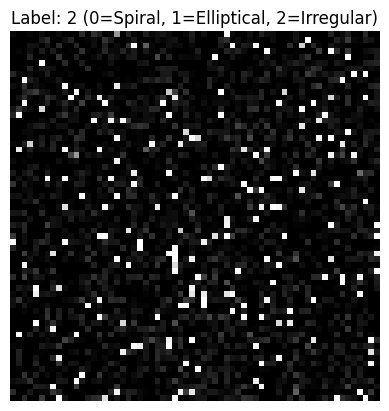

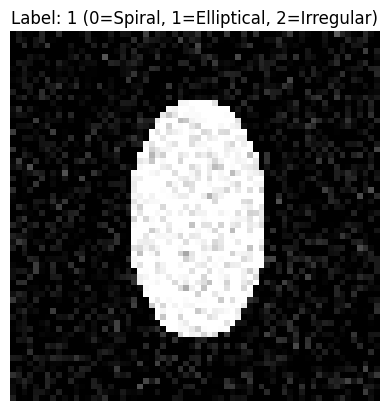

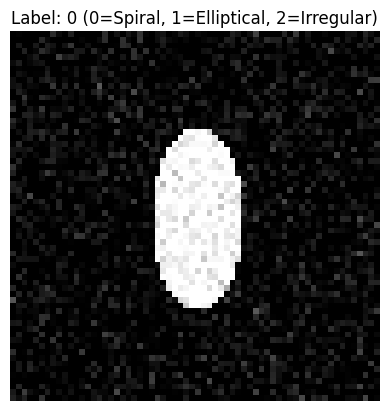

In [10]:
X_train, X_test, y_train, y_test = create_galaxy_dataset(num_samples=10000, img_size=64, noise_level=0.1)

# Save training and testing images as .png
save_images_as_png(X_train, y_train, output_dir='synthetic_galaxy_images/train')
save_images_as_png(X_test, y_test, output_dir='synthetic_galaxy_images/test')

# Visualize a few examples
for i in range(3):
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]} (0=Spiral, 1=Elliptical, 2=Irregular)")
    plt.axis('off')
    plt.show()